<a href="https://colab.research.google.com/github/stephiioo/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install sqlalchemy
from sqlalchemy import create_engine
import sqlite3

#Import New York Presbytarian hospital pricing transparency dataset

In [ ]:
json1 = pd.read_json('/content/133957095_NewYorkPresbyterianHospital_standardcharges.json')
json1

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


#Data cleaning for New York Presbytarian hospital

##Check for misssing values

In [ ]:
# check for missing values and count them
missing_values = json1.isna().sum()

# calculate the percentage of missing values
percentage_missing = (missing_values / len(json1)) * 100

# Display of the results
print("Missing Values:")
print(missing_values)
print("\nPercent of Missing Values:")
print(percentage_missing)

Missing Values:
Code (CPT/DRG)                          0
Description                             0
Rev Code                                0
Inpatient/Outpatient                    0
Gross Charges                           0
Discounted Cash Price                   0
Aetna                                   0
Cigna                                   0
Empire Blue Cross Blue Shield           0
Emblem Health                           0
United Health Group                     0
Aetna Medicare                          0
AgeWell Medicare                        0
Emblem Medicare                         0
Empire Medicare                         0
Fidelis Medicare                        0
Healthfirst Medicare                    0
UHC Community Plan/United Medicare      0
VNS Medicare                            0
WellCare Medicare                       0
1199                                    0
Affinity Molina Essential               0
Affinity Molina Medicaid/CHP            0
Amida Care Medicai

##Drop all empty columns

In [ ]:
# Get the number of columns before dropping any empty columns
num_columns_before = json1.shape[1]

# Drop any empty columns
json1.dropna(axis=1, how='all', inplace=True)

# Get the number of columns after dropping empty columns
num_columns_after = json1.shape[1]

# Calculate the number of empty columns that were dropped
num_empty_columns_dropped = num_columns_before - num_columns_after

# Print results
print(f"Number of empty columns dropped: {num_empty_columns_dropped}")

Number of empty columns dropped: 0


##Remove any duplicate rows and columns

In [ ]:
# Remove duplicate rows
json1_no_duplicates = json1.drop_duplicates()

# Check for duplicate columns
duplicate_columns = json1_no_duplicates.columns[json1_no_duplicates.columns.duplicated()]

# Remove duplicate columns
json1_no_duplicate_columns = json1_no_duplicates[json1_no_duplicates.columns[~json1_no_duplicates.columns.duplicated()]]

##Clean the columns

In [ ]:
# Clean the column names
json1.columns = json1.columns.str.lower()
json1.columns = json1.columns.str.strip()
json1.columns = json1.columns.str.replace(' ', '_')
json1.columns = json1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Print the updated column names
print(json1.columns)

Index(['code_cptdrg', 'description', 'rev_code', 'inpatientoutpatient',
       'gross_charges', 'discounted_cash_price', 'aetna', 'cigna',
       'empire_blue_cross_blue_shield', 'emblem_health', 'united_health_group',
       'aetna_medicare', 'agewell_medicare', 'emblem_medicare',
       'empire_medicare', 'fidelis_medicare', 'healthfirst_medicare',
       'uhc_community_planunited_medicare', 'vns_medicare',
       'wellcare_medicare', '1199', 'affinity_molina_essential',
       'affinity_molina_medicaidchp', 'amida_care_medicaid',
       'emblem_medicaidchp', 'empire_healthplus_essential',
       'empire_healthplus_exchange', 'empire_healthplus_medicaidchp',
       'fidelis_essentialexchange', 'fidelis_medicaidchp',
       'healthfirst_essentialexchange', 'healthfirst_medicaidchp',
       'mvp_medicaidchp', 'mvp_essential', 'united_community_plan_essential',
       'united_community_plan_medicaid', 'vns_medicaid',
       'consumer_health_network', 'devon', 'equian', 'first_health',
 

#Exploratory analysis for New York Presbytarian hospital

##Check column types

In [ ]:
json1.dtypes

code_cptdrg                           object
description                           object
rev_code                              object
inpatientoutpatient                   object
gross_charges                        float64
discounted_cash_price                float64
aetna                                 object
cigna                                 object
empire_blue_cross_blue_shield         object
emblem_health                         object
united_health_group                   object
aetna_medicare                        object
agewell_medicare                      object
emblem_medicare                       object
empire_medicare                       object
fidelis_medicare                      object
healthfirst_medicare                  object
uhc_community_planunited_medicare     object
vns_medicare                          object
wellcare_medicare                     object
1199                                  object
affinity_molina_essential             object
affinity_m

##Look for outliers

In [ ]:
json1.describe()

,gross_charges,discounted_cash_price,minimum_negotiated_charge,maximum_negotiated_charge
count,6.193000e+03,6.193000e+03,5912.000000,5.912000e+03
mean,3.385988e+04,3.385988e+04,2249.918880,2.390277e+04
std,1.062409e+05,1.062409e+05,6015.717204,7.136503e+04
min,1.000000e+00,1.000000e+00,0.454400,1.608000e+00
25%,5.970000e+02,5.970000e+02,122.228437,6.380010e+02
50%,3.925000e+03,3.925000e+03,431.142905,4.086731e+03
75%,3.033600e+04,3.033600e+04,2107.000000,1.925640e+04
max,2.538980e+06,2.538980e+06,204861.126000,1.713460e+06


##Create a histogram

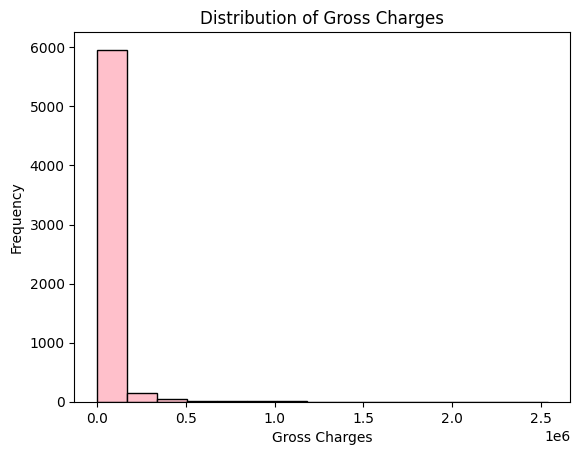

In [ ]:
json1['gross_charges'].plot.hist(bins=15, color='pink', edgecolor='black')
plt.xlabel('Gross Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Charges')
plt.show()

##Create a frequency count

In [ ]:
frequency_count = json1['empire_healthplus_essential'].value_counts()
print(frequency_count)

Not separately payable         446
Included in Service Package    234
190.4488947622                 118
1307.4003956636                 99
242.2919270951                  94
                              ... 
61316.1219363376                 1
32446.2825                       1
62169.4851517906                 1
35836.9384318803                 1
22481.5183207636                 1
Name: empire_healthplus_essential, Length: 1139, dtype: int64


#Import Stony Brook Hospital pricing transparency dataset

In [ ]:
csv1 = pd.read_csv('/content/stonybrook.csv')
csv1

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data cleaning for Stony Brook Hospital

##Check for missing values

In [ ]:
# check for missing values and count them
missing_values = csv1.isna().sum()

# calculate the percentage of missing values
percentage_missing = (missing_values / len(csv1)) * 100

# Display of the results
print("Missing Values:")
print(missing_values)
print("\nPercent of Missing Values:")
print(percentage_missing)

Missing Values:
Code                                               0
Description                                        0
Type                                             783
Package/Line_Level                               783
Gross charge                                       0
Discounted cash price                              0
De-identified min contracted rate               1456
De-identified max contracted rate               1456
Derived contracted rate                         1456
1199-Commercial other                           6696
Aetna-Medicare Advantage HMO                    6604
Aetna-Commercial HMO/POS                        5883
Aetna-Commercial PPO/Open Access                6098
Aetna-Commercial other                          7582
Empire Health-Commercial other                  4650
Empire Health-Commercial PPO/Open Access        5308
BlueCross BlueShield-Commercial other           6456
Beacon Health-Commercial other                  7707
Carelon Health-Commercial othe

##Drop all empty columns

In [ ]:
# Get the number of columns before dropping any empty columns
num_columns_before = csv1.shape[1]

# Drop any empty columns
csv1.dropna(axis=1, how='all', inplace=True)

# Get the number of columns after dropping empty columns
num_columns_after = csv1.shape[1]

# Calculate the number of empty columns that were dropped
num_empty_columns_dropped = num_columns_before - num_columns_after

# Print results
print(f"Number of empty columns dropped: {num_empty_columns_dropped}")

Number of empty columns dropped: 6


##Remove any duplicate rows and columns if they exist

In [ ]:
# Remove duplicate rows
csv1_no_duplicates = csv1.drop_duplicates()

# Check for duplicate columns
duplicate_columns = csv1_no_duplicates.columns[csv1_no_duplicates.columns.duplicated()]

# Remove duplicate columns
csv1_no_duplicate_columns = csv1_no_duplicates[csv1_no_duplicates.columns[~csv1_no_duplicates.columns.duplicated()]]

##Cleaning the columns

In [ ]:
# Clean the column names
csv1.columns = csv1.columns.str.lower()
csv1.columns = csv1.columns.str.strip()
csv1.columns = csv1.columns.str.replace(' ', '_')
csv1.columns = csv1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Print the updated column names
print(csv1.columns)

Index(['code', 'description', 'type', 'packageline_level', 'gross_charge',
       'discounted_cash_price', 'deidentified_min_contracted_rate',
       'deidentified_max_contracted_rate', 'derived_contracted_rate',
       '1199commercial_other', 'aetnamedicare_advantage_hmo',
       'aetnacommercial_hmopos', 'aetnacommercial_ppoopen_access',
       'aetnacommercial_other', 'empire_healthcommercial_other',
       'empire_healthcommercial_ppoopen_access',
       'bluecross_blueshieldcommercial_other', 'beacon_healthcommercial_other',
       'carelon_healthcommercial_other', 'cignacommercial_ppoopen_access',
       'cignacommercial_other', 'cignacommercial_hmopos',
       'emblemhealthcommercial_ppoopen_access', 'emblemhealthcommercial_other',
       'emblemhealthcommercial_hmopos', 'empire_healthcommercial_hmopos',
       'empire_healthmedicare_advantage_hmo', 'empire_healthmedicaid_hmo',
       'evernorthcommercial_other', 'fideliscommercial_other',
       'fidelismedicare_advantage_hmo',

#Exploratory analysis for Stony Brook Hospital

##Check column types

In [ ]:
csv1.dtypes

code                                           object
description                                    object
type                                           object
packageline_level                              object
gross_charge                                  float64
discounted_cash_price                         float64
deidentified_min_contracted_rate              float64
deidentified_max_contracted_rate              float64
derived_contracted_rate                       float64
1199commercial_other                          float64
aetnamedicare_advantage_hmo                   float64
aetnacommercial_hmopos                        float64
aetnacommercial_ppoopen_access                float64
aetnacommercial_other                         float64
empire_healthcommercial_other                 float64
empire_healthcommercial_ppoopen_access        float64
bluecross_blueshieldcommercial_other          float64
beacon_healthcommercial_other                 float64
carelon_healthcommercial_oth

##Look for outliers

In [ ]:
csv1.describe()

,gross_charge,discounted_cash_price,deidentified_min_contracted_rate,deidentified_max_contracted_rate,derived_contracted_rate,1199commercial_other,aetnamedicare_advantage_hmo,aetnacommercial_hmopos,aetnacommercial_ppoopen_access,aetnacommercial_other,...,molinacommercial_other,optumcommercial_other,oxfordcommercial_other,tricarecommercial_other,united_healthcarecommercial_other,united_healthcaremedicare_advantage_hmo,united_healthcarecommercial_hmopos,united_healthcaremedicaid_hmo,united_healthcarecommercial_ppoopen_access,veteran_familycommercial_other
count,7.710000e+03,7.710000e+03,6254.000000,6.254000e+03,6254.000000,1014.000000,1106.000000,1827.000000,1612.000000,128.000000,...,747.000000,943.000000,1777.000000,434.000000,2357.000000,624.000000,133.000000,2065.000000,357.000000,46.000000
mean,2.274832e+04,2.274832e+04,4090.693876,1.003579e+04,6315.587725,5791.542456,5614.005027,4320.418248,4436.188381,1703.756250,...,3018.305462,10868.205705,2572.653849,2070.212120,5977.464298,4438.776234,3261.594586,2454.314228,789.416667,702.261087
std,7.470570e+04,7.470570e+04,10576.213503,2.915075e+04,14601.846406,24302.352403,12671.487487,8718.537182,8881.733882,5124.232802,...,10208.450569,20703.429246,4036.667401,8501.228677,16227.981498,9982.579323,10266.478193,11009.140577,2880.486830,1717.006016
min,3.000000e-02,3.000000e-02,0.010000,1.000000e-01,0.030000,0.010000,1.100000,0.020000,0.500000,0.590000,...,0.240000,2.370000,0.010000,1.000000,0.010000,1.330000,0.190000,0.010000,0.180000,2.480000
25%,1.065895e+03,1.065895e+03,96.520000,6.982500e+02,403.117500,148.797500,125.070000,277.900000,312.750000,110.387500,...,59.055000,200.450000,197.880000,71.220000,258.500000,96.290000,129.000000,42.980000,8.400000,26.810000
50%,4.745295e+03,4.745295e+03,1108.860000,4.311000e+03,2600.740000,974.400000,714.860000,2153.000000,2153.000000,404.500000,...,291.530000,1700.200000,1932.380000,236.230000,1571.000000,387.500000,444.000000,425.790000,34.830000,82.710000
75%,1.103881e+04,1.103881e+04,4309.532500,8.170000e+03,5870.540000,4592.000000,5782.430000,4822.000000,4822.000000,1778.920000,...,1180.375000,13359.895000,4704.000000,1486.947500,5127.000000,3531.920000,2257.430000,1753.100000,286.800000,235.000000
max,1.857952e+06,1.857952e+06,327869.690000,1.302636e+06,370099.900000,331304.280000,157848.600000,99999.990000,96372.570000,54838.130000,...,152787.470000,277267.380000,80891.260000,154940.610000,291490.750000,92493.910000,88051.340000,327869.690000,26350.000000,7195.400000


##Create a histogram

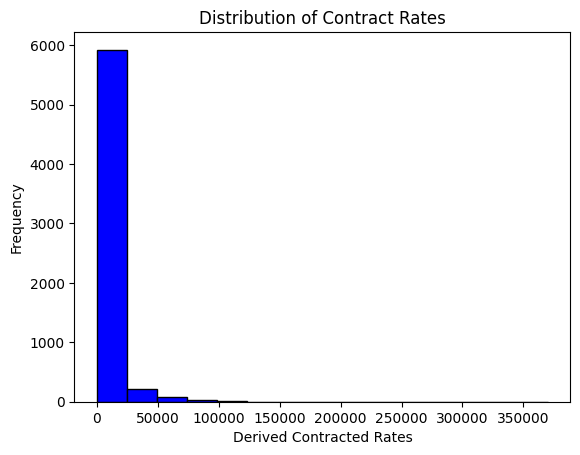

In [ ]:
csv1['derived_contracted_rate'].plot.hist(bins=15, color='blue', edgecolor='black')
plt.xlabel('Derived Contracted Rates')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Rates')
plt.show()

##Create a frequency count

In [ ]:
frequency_count = csv1['optumcommercial_other'].value_counts()
print(frequency_count)

125.07       12
423.03       10
1865.83      10
11538.75     10
132.47        8
             ..
60963.56      1
46496.55      1
98612.49      1
120434.86     1
29781.15      1
Name: optumcommercial_other, Length: 616, dtype: int64


##Observations
- There were no empty columns for New York Presbytarian hospital but there were 4 empty columns for Stony Brook Hospital
- There was no need to exclude any outliers from either datasets

#SQLite Database Operations

##Creating a temporary + local DB using SQLITE

In [28]:
conn = sqlite3.connect('health.db')
c = conn.cursor()

## Manual Table Creation

## Now lets create a new table called stonybrook with the health.db file

In [34]:
c.execute("""
            CREATE TABLE sbu23
                (
                    hospital_name text,
                    insurance_type text,
                    code text,
                    code_description text,
                    cost_negotiated real,
                    cost_minimum real,
                    cost_maximum real
                );
          """)

conn.commit()

## Lets now confirm that the new table stonybrook has been created within the database costs.db

In [35]:
c.execute('''
  SELECT name
  FROM sqlite_master
  WHERE type='table';
  ''')

c.fetchall()

[('stonybrook',), ('sbu',), ('sbu23',)]

In [36]:
c.execute('''
  SELECT * FROM sbu23;
''')

print(c.fetchall())

[]


In [41]:
sql_query = """

INSERT INTO sbu23 (
  'hospital_name',
  'insurance_type',
  'code',
  'code_description',
  'cost_negotiated',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'sbu hospital',
    'optum',
    '303396',
    'office visit',
    100.00,
    90.00,
    1000.00
  );

"""

print(sql_query)



INSERT INTO sbu23 (
  'hospital_name',
  'insurance_type',
  'code',
  'code_description',
  'cost_negotiated',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'sbu hospital',
    'optum',
    '303396',
    'office visit',
    100.00,
    90.00,
    1000.00
  );




In [43]:
c.execute(sql_query)
conn.commit()

## Lets now check that the one row has been inserted using sqlite

In [44]:
sql_query_2 = """

select *
from sbu23;

"""

c.execute(sql_query_2)
print(c.fetchall())

[('sbu hospital', 'optum', '303396', 'office visit', 100.0, 90.0, 1000.0)]


In [45]:
engine = create_engine('sqlite:///costs.db')

In [46]:
pd.read_sql_query("select * from sbu23;", conn)

,hospital_name,insurance_type,code,code_description,cost_negotiated,cost_minimum,cost_maximum
0,sbu hospital,optum,303396,office visit,100.0,90.0,1000.0


##Automatic Table Creation

## Load in real data

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_504_2023/main/WK3/data/stonybrook/stonybrook.csv')

df.shape

df.columns

columnNames = list(df)
idVars = columnNames[:6]
valueVars = columnNames[6:]

stonybrook_modified = df.melt(id_vars=idVars, value_vars=valueVars)

stonybrook_modified.columns

stonybrook_modified.rename(columns={'HospCode':'hospital_name',
            'variable':'gross_charge',
            'Code':'code',
            'Description':'code_description',
             'value':'cost_negotiated',
             'Minimum Negotiated Charge':'cost_minimum',
             'Maximum Negotiated Charge': 'cost_maximum'}, inplace=True)

stonybrook_modified['gross_charge'].value_counts()

stonybrook_modified

,code,code_description,Type,Package/Line_Level,Gross charge,Discounted cash price,gross_charge,cost_negotiated
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,De-identified min contracted rate,2155.50
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,De-identified min contracted rate,87.02
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,De-identified min contracted rate,87.02
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,De-identified min contracted rate,58.55
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,De-identified min contracted rate,446.28
...,...,...,...,...,...,...,...,...
393205,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,Veteran Family-Commercial other,NaN
393206,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,Veteran Family-Commercial other,NaN
393207,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,Veteran Family-Commercial other,NaN
393208,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,Veteran Family-Commercial other,NaN


In [61]:
stonybrook_modified.to_sql('stonybrook', conn, if_exists='replace')

393210

In [64]:
query = """
  select *
  from stonybrook
  where code = '10004'
  limit 1000;
"""

response = pd.read_sql(query, conn)
response

,index,code,code_description,Type,Package/Line_Level,Gross charge,Discounted cash price,gross_charge,cost_negotiated
0,0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,De-identified min contracted rate,2155.5
1,7710,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,De-identified max contracted rate,2155.5
2,15420,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,Derived contracted rate,2155.5
3,23130,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,1199-Commercial other,NaN
4,30840,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,Aetna-Medicare Advantage HMO,NaN
5,38550,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,Aetna-Commercial HMO/POS,NaN
6,46260,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,Aetna-Commercial PPO/Open Access,NaN
7,53970,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,Aetna-Commercial other,NaN
8,61680,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,Empire Health-Commercial other,2155.5
9,69390,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,Empire Health-Commercial PPO/Open Access,NaN
